In [2]:
import os
from PIL import Image
import requests
import pypdfium2 as pdfium

while "mlx_ocr" not in os.listdir():
    os.chdir("..")


from mlx_ocr import MLXOCR
from mlx_ocr.data.pdf.page_handler import PageHandler, PageHandlerConfig


ocr = MLXOCR(det_lang="eng", rec_lang="eng")
ocr

True
13:08 [mlx_ocr.utils.ppocr.download] INFO: Note: there are multiple options available: ['best_accuracy.pdparams', 'student.pdparams']. Defaulting to first. You can set the option using the `select_model` argument.


MLXOCR(
	text_detector=TextDetector(PP-OCRv3_eng_det[None]),
	text_recognizer=TextRecognizer(PP-OCRv3_eng_rec[None])
)

13:08 [mlx_ocr] INFO: det time: 0.0014s
13:08 [mlx_ocr] INFO: rec time: 1.8450s, time_per_char: 0.0004s


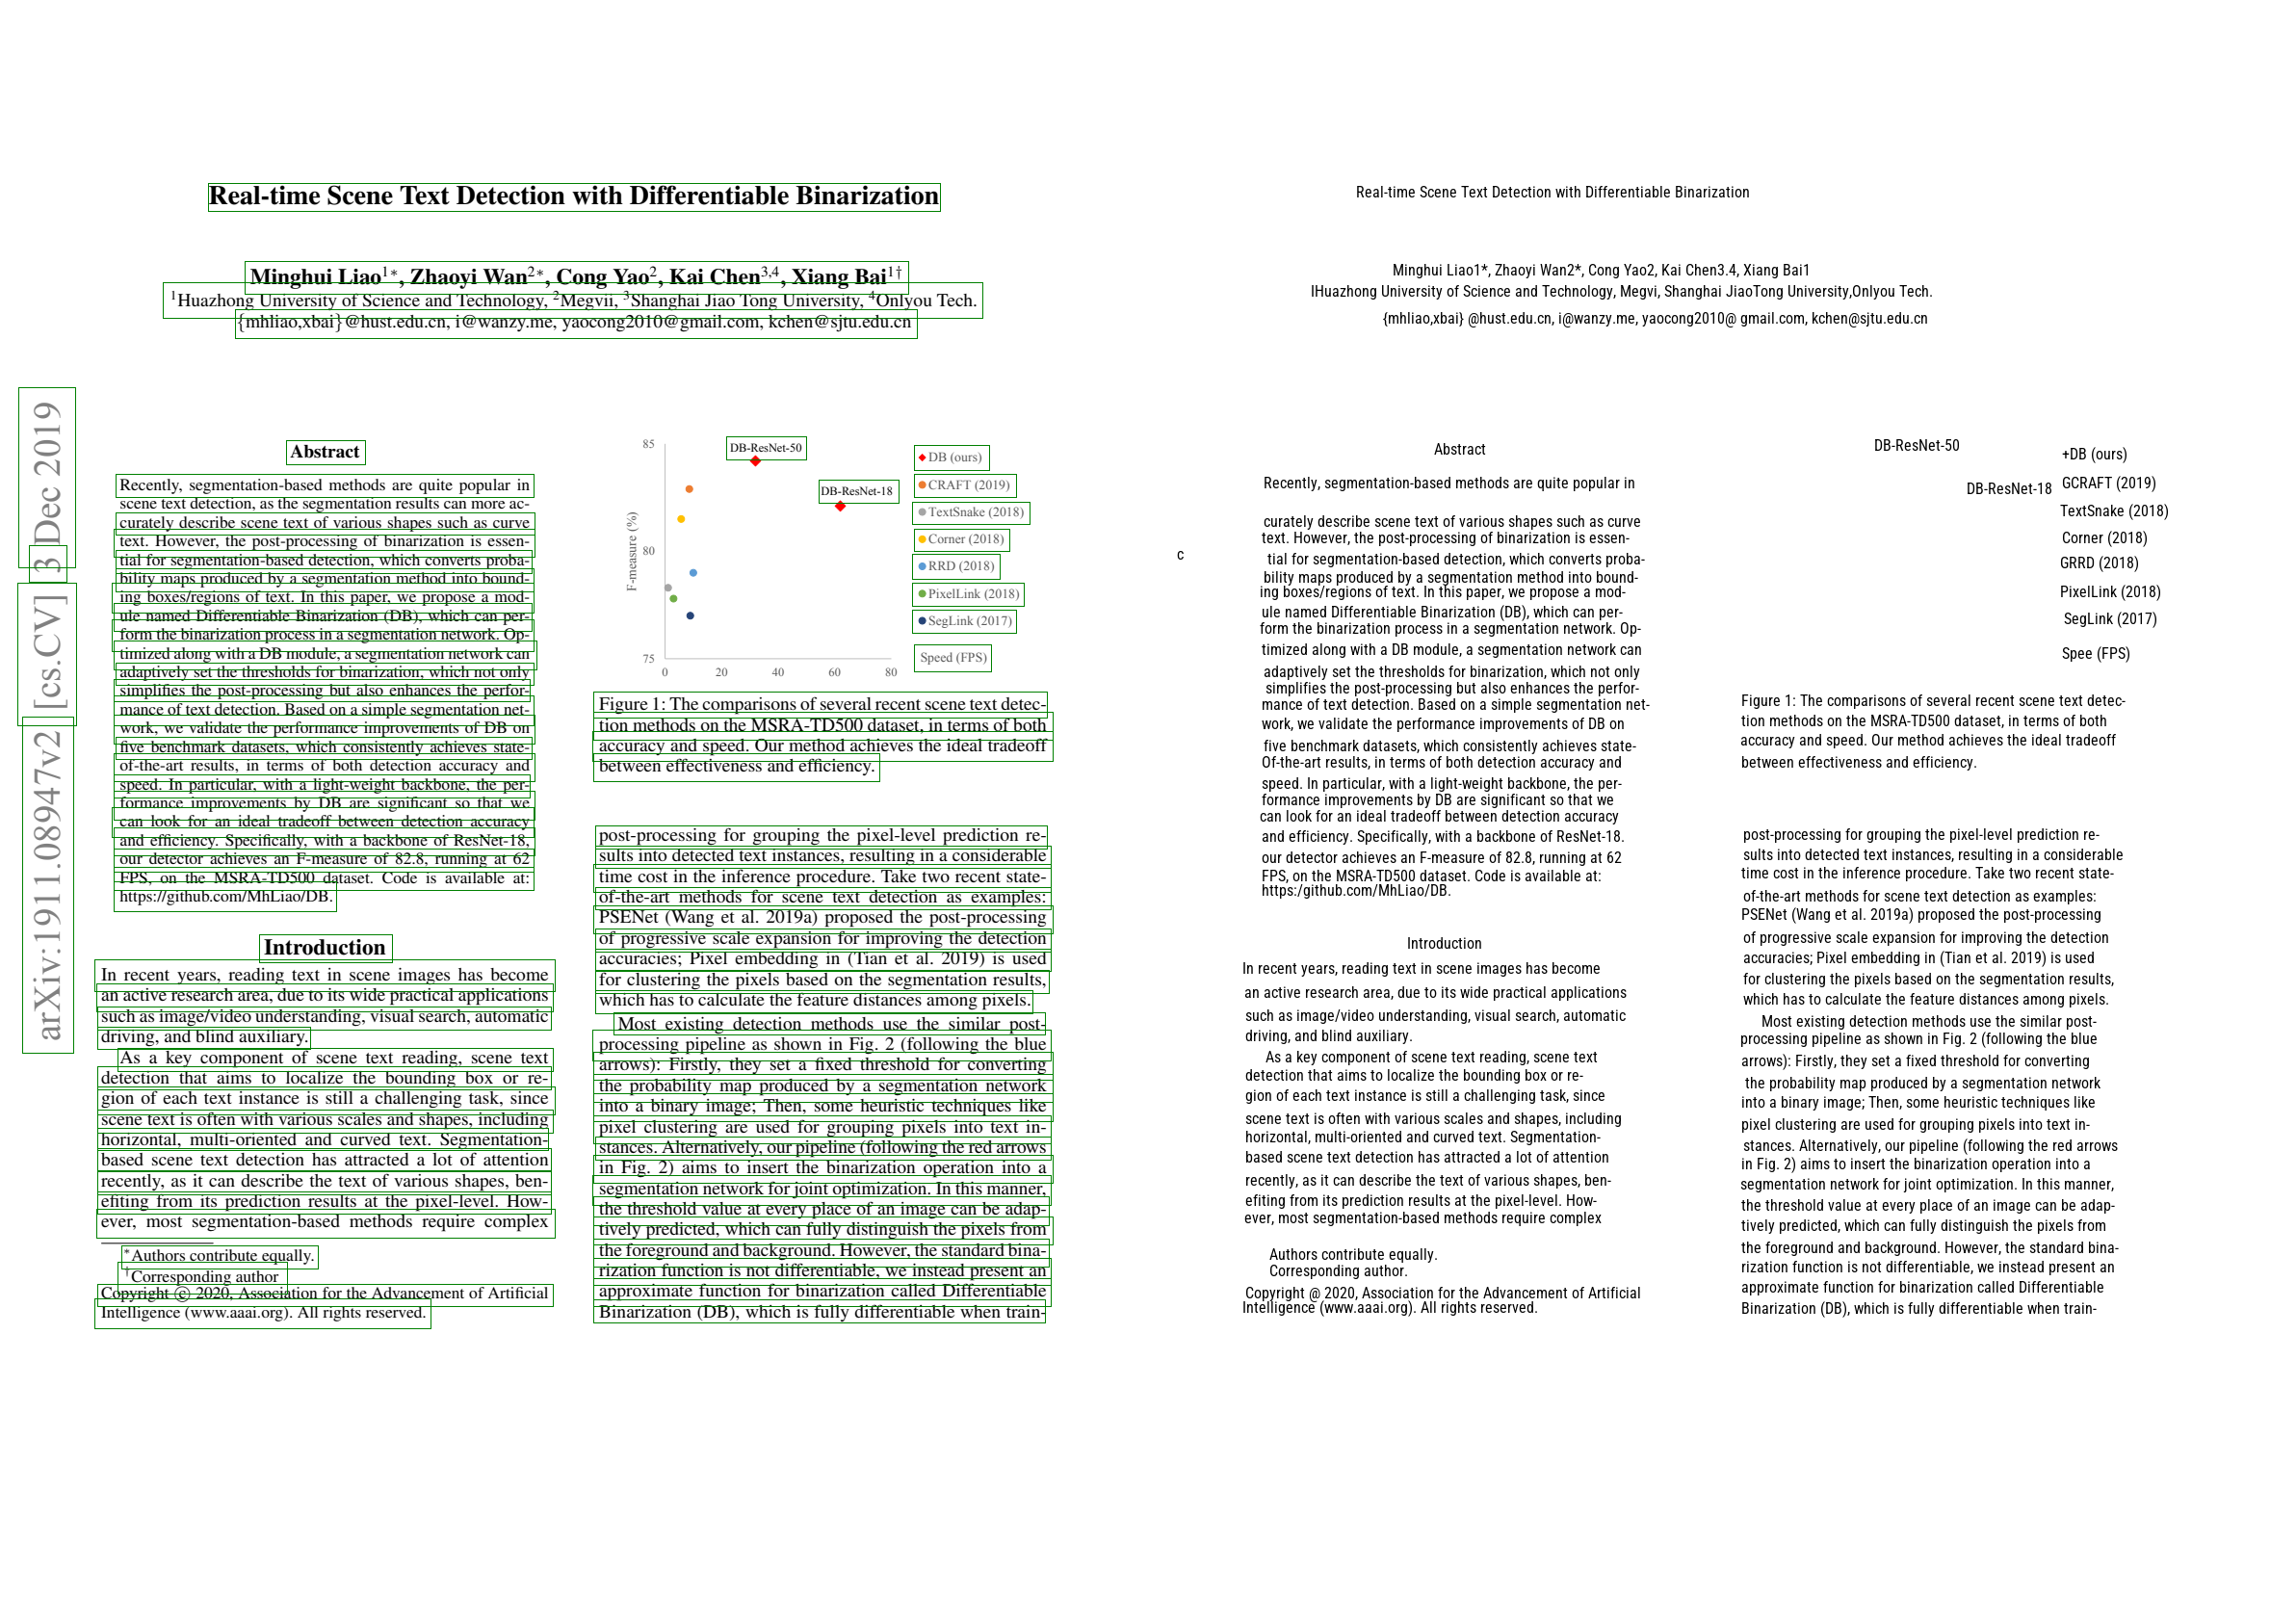

In [3]:
# Download example pdf
pdf_path = "db.pdf"
url = "https://arxiv.org/pdf/1911.08947"
response = requests.get(url)
if not os.path.exists(pdf_path):
    print(f"Downloading {pdf_path} from {url}...")
    with open(pdf_path, "wb") as f:
        f.write(response.content)

pdf = pdfium.PdfDocument(pdf_path)
page_handler = PageHandler(PageHandlerConfig(pdf[0], resize=(2 * 596, 2 * 842)))
orig_img = page_handler._create_base_image()
ocr.visualize_ocr(orig_img)